In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os


In [2]:
def plot_avg_time_vs_corr_prest_merit(foldername, curiosity,ax =None, length=401):

    corrs =  [[] for k in range(length)]
    
    for filename in os.listdir(foldername):
        if  f"curiosity{curiosity}" in filename:
            df = pd.read_csv(os.path.join(foldername, filename))
            for step, corr in zip(df['Step'], df['corr_prestige_localMerit']):
                corrs[step].append(corr)

    mean_corrs = [np.mean(corrs_at_t) for corrs_at_t in corrs]
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.plot(range(length), mean_corrs, label=f"Curiosity={curiosity}", alpha=0.7,color = plt.cm.viridis(curiosity))
    ax.set_xlabel("Time")
    ax.set_ylabel("Correlation between Prestige and Merit")


def plot_all_curiosities(foldername):
    fig, ax = plt.subplots(figsize=(10, 6))
    names  = os.listdir(foldername)
    curiosities = [float(name.split("curiosity")[1].split("_")[0]) for name in names if "curiosity" in name]
    unique_curiosities = list(set(curiosities))
    unique_curiosities.sort()
    for curiosity in unique_curiosities:
        plot_avg_time_vs_corr_prest_merit(foldername, curiosity, ax=ax,length=1601)
    ax.legend()
    plt.show()


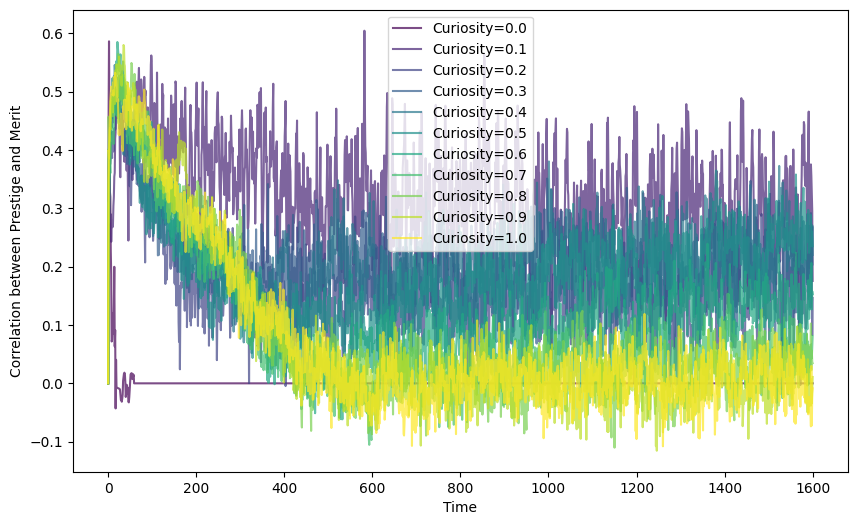

In [ ]:
plot_all_curiosities("data/testlongrun")


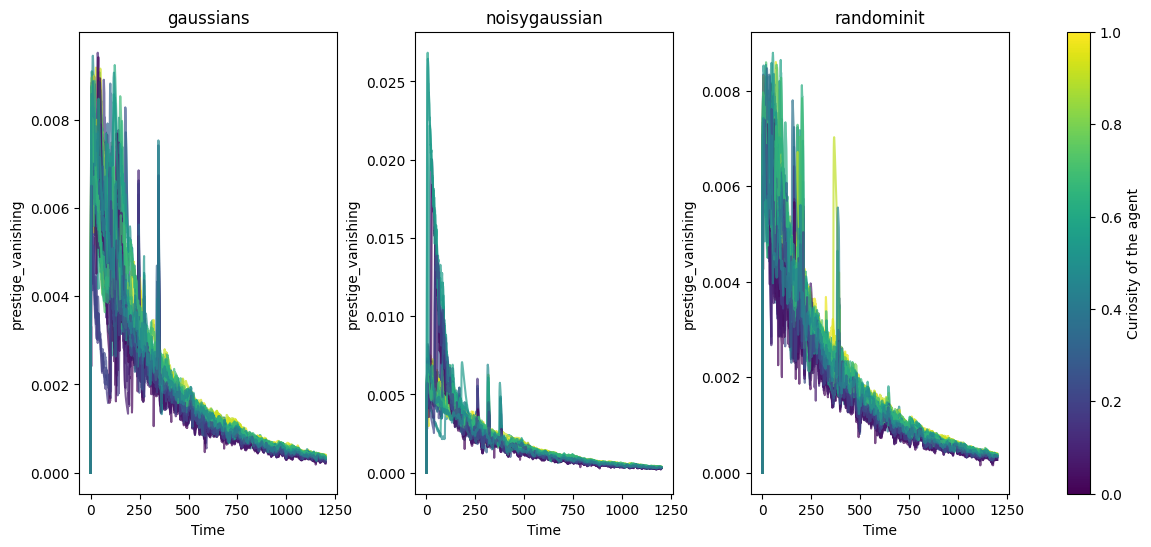

In [4]:
def plot_agent_based_data(csv_name,prestige_type="prestige", ax = None):
    df = pd.read_csv(csv_name)
    if ax ==None:
        fig, ax = plt.subplots(figsize=(10, 6))
    for agent_id, agent_data in df.groupby('AgentID'):
        ax.plot(agent_data['Step'], agent_data[prestige_type], alpha=0.7, color = plt.cm.viridis(agent_data["curiosity"].iloc[0]))
    ax.set_xlabel("Time")
    ax.set_ylabel(prestige_type)
    title = csv_name.split("_")[-1].split(".csv")[0]
    ax.set_title(title)
    #ax.set_title(f"{pretige_type} over Time for Agents in {csv_name}")
    # add a colorbar for curiosity

def plot_multiple_agent_based_data(list_of_csv_names, prestige_type="prestige"):
    n = len(list_of_csv_names)
    fig, axs = plt.subplots(1,n, figsize=(n*5, 6), gridspec_kw={'wspace': 0.3})
    for k in range(n):
        ax = axs[k]
        csv_name = list_of_csv_names[k]
        plot_agent_based_data(csv_name, ax =ax, prestige_type=prestige_type)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm, ax=axs)
    cbar.set_label('Curiosity of the agent')
    plt.show()

L = ["data/agent_data_gaussians.csv", "data/agent_data_noisygaussian.csv", "data/agent_data_randominit.csv"]
plot_multiple_agent_based_data(L, prestige_type="prestige_vanishing")

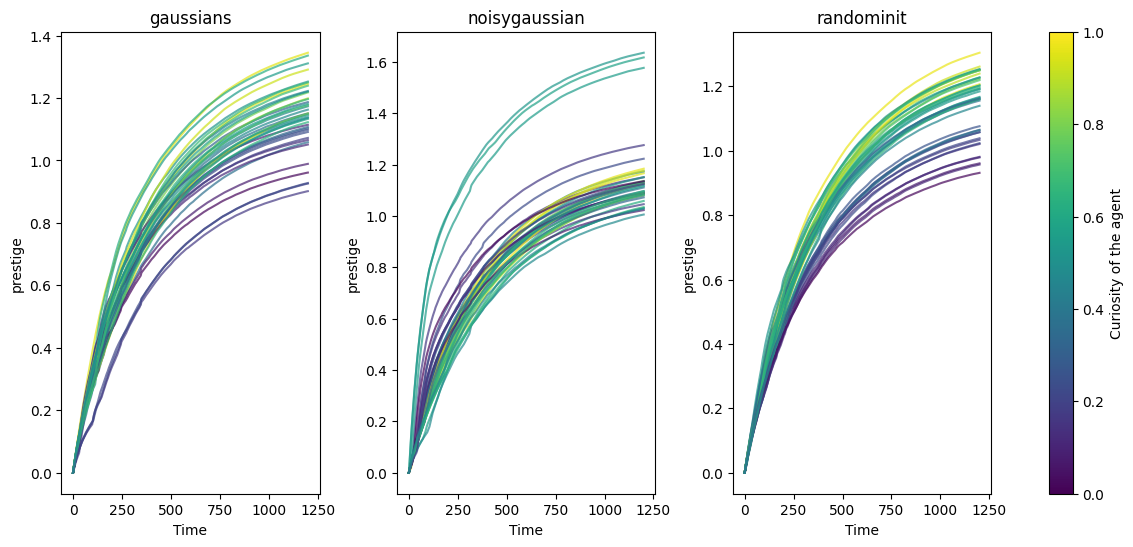

In [5]:
plot_multiple_agent_based_data(L, prestige_type="prestige")

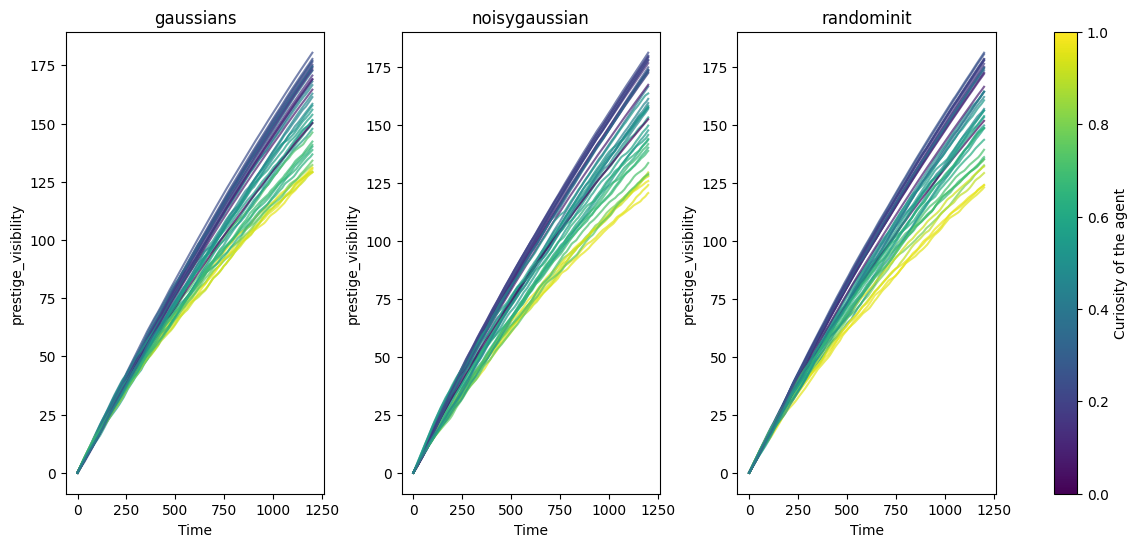

In [6]:
plot_multiple_agent_based_data(L, prestige_type="prestige_visibility")